In [13]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
quandl.ApiConfig.api_key = 'ekUM3Ut18s6GyHRFqxV9'

# Quandl API offers data up to 3/27/2018
df = quandl.get("WIKI/AMZN", paginate = False)
df = df[['Adj. Close']]
df.head()
df.tail()

,Adj. Close
Date,
2018-03-21,1581.86
2018-03-22,1544.10
2018-03-23,1495.56
2018-03-26,1555.86
2018-03-27,1497.05


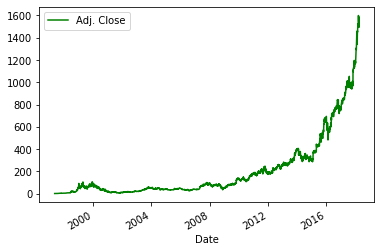

In [15]:
df['Adj. Close'].plot(color = 'g')

plt.legend()
plt.show()

In [16]:
pred_days = 30
df['Prediction'] = df['Adj. Close'].shift(-pred_days)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [17]:
X_pred = X[-pred_days:]
X = X[:-pred_days]

Y = np.array(df['Prediction'])
Y = Y[:-pred_days]

In [18]:
try:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
except:
    print(X.shape)
    print(Y.shape)

In [19]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

confidence = clf.score(X_test, Y_test)

forecast = clf.predict(X_pred)
print(forecast)

[1497.82108886 1536.58796504 1547.95067013 1534.08413834 1554.94228792
 1570.40023499 1572.35237106 1588.52115029 1611.80886053 1601.23125365
 1601.7298971  1581.57197024 1588.78638617 1613.57002677 1628.45506434
 1636.26360864 1643.54168118 1672.21898449 1692.90738311 1682.07514979
 1685.06701051 1675.85802076 1664.56958172 1636.18934259 1680.30337411
 1675.36998675 1635.30875947 1583.81056107 1647.78545526 1585.39136691]


(17262.0, 17653.0)

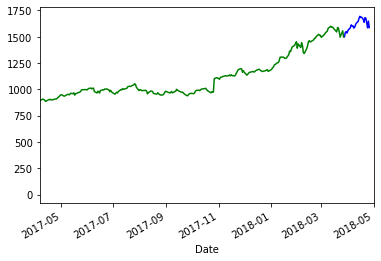

In [20]:
dates = pd.date_range(start = '2018-03-28', end = '2018-04-26')
plt.plot(dates, forecast, color = 'b')
df['Adj. Close'].plot(color = 'g')
plt.xlim(xmin = datetime.date(2017,4,6), xmax = datetime.date(2018,5,2))

In [37]:
def linearReg(ticker, days):

    df = quandl.get("WIKI/" + ticker.upper(), paginate = False)
    df = df[['Adj. Close']]
    pred_days = days
    df['Prediction'] = df['Adj. Close'].shift(-pred_days)

    X = np.array(df.drop(['Prediction'], 1))
    X = preprocessing.scale(X)
    X_pred = X[-pred_days:]
    X = X[:-pred_days]

    Y = np.array(df['Prediction'])
    Y = Y[:-pred_days]  

    try:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    except:
        print(X.shape)
        print(Y.shape)

    clf = LinearRegression()
    clf.fit(X_train, Y_train)
    confidence = clf.score(X_test, Y_test)

    forecast = clf.predict(X_pred)
    
    end_date = datetime.date(2018,3,28) + datetime.timedelta(days = pred_days - 1) 
    dates = pd.date_range(start = '2018-03-28', end = end_date.isoformat())
    return dates, forecast
test = linearReg("AMZN", 30)
print(test[1])
print(test[0])


[1495.62531461 1534.33459255 1545.68041539 1531.83448593 1552.66164532
 1568.09662561 1570.04586128 1586.1906176  1609.44372791 1598.8818368
 1599.37973939 1579.25176235 1586.4554594  1611.20227748 1626.06519947
 1633.86214215 1641.12940123 1669.76409698 1690.42175762 1679.60561838
 1682.59303392 1673.39772652 1662.12605938 1633.78798645 1677.83647514
 1672.9104176  1632.90871166 1581.48702717 1645.36687008 1583.06548432]
DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[n